<img src = "images/3_logos.png" width = 600, align = "center">
<br>
<h1 align=center>Réseaux de neurones avec Keras</h1>

## Imports

In [1]:
%matplotlib inline

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import sklearn
import sys
import tensorflow as tf
from tensorflow import keras
import time

## Exercice 1 – TensorFlow Playground

[TensorFlow Playground](http://playground.tensorflow.org).

- **Layers et patterns**: essayez d’entraîner le réseau de neurones par défaut en cliquant sur le bouton "Exécuter" (en haut à gauche). Remarquez comment il trouve rapidement une bonne solution pour la tâche de classification. Notez que les neurones de la première couche cachée ont appris des motifs simples, tandis que les neurones de la deuxième couche cachée ont appris à combiner les motifs simples de la première couche cachée en des motifs plus complexes. En général, plus il y a de couches, plus les motifs peuvent être complexes.

- **Fonction d'activation**: essayez de remplacer la fonction d'activation Tanh par la fonction d'activation ReLU, puis entraînez à nouveau le réseau. Notez qu'il trouve une solution encore plus rapidement, mais cette fois, les limites sont linéaires. Cela est dû à la forme de la fonction ReLU.

- **Minima locaux**: modifiez l’architecture du réseau pour n’avoir qu’une couche cachée avec trois neurones. Entraînez-le plusieurs fois (pour réinitialiser les poids du réseau, ajoutez et supprimez un neurone). Notez que le temps d’entraînement varie beaucoup et que parfois, il s’arrête sur un minimum local.

- **Trop petit**: supprimez maintenant un neurone pour ne garder que 2. Notez que le réseau de neurones est maintenant incapable de trouver une bonne solution, même si vous essayez plusieurs fois. Le modèle a trop peu de paramètres et sous-complète systématiquement l'ensemble de formation.

- **Assez grand**: ensuite, définissez un nombre de neurones à 8 et entraînez le réseau plusieurs fois. Notez qu'il est maintenant constamment rapide et ne reste jamais bloqué. Cela met en évidence une découverte importante de la théorie des réseaux de neurones: les grands réseaux de neurones ne se coincent presque jamais dans les minima locaux, et même lorsqu'ils le font, ces optima locaux sont presque aussi bons que l'optimum global. Cependant, ils peuvent rester bloqués sur de longs plateaux pendant longtemps.

- **Gradients profonds et nuls**: changez maintenant le jeu de données en spirale (jeu de données en bas à droite sous "DONNEES"). Changez l'architecture du réseau pour avoir 4 couches cachées de 8 neurones chacune. Notez que l'entraînement prend beaucoup plus de temps et reste souvent bloqué sur des plateaux pendant de longues périodes. Notez également que les neurones situés dans les couches les plus hautes (c’est-à-dire à droite) ont tendance à évoluer plus rapidement que les neurones situés dans les couches les plus basses (c.-à-d. À gauche). Ce problème, appelé le problème des "gradients disparus", peut être résolu en utilisant une meilleure initialisation du poids et d'autres techniques, de meilleurs optimiseurs (tels que AdaGrad ou Adam) ou en utilisant la normalisation par lots.

- **Ensuite**: jouez pendant au moins une heure quand vous avez le temps !

## Exercice 2 – Classification d'images Fashion MNIST

Charger le jeu de données fashion MNIST. Keras a un certain nombre de fonctions (dont load_data()) pour charger des jeux de données populaires dans `keras.datasets`. Le jeu de données est déjà divisé en un jeu d'apprentissage et un jeu de tests, mais il peut être utile de fractionner davantage le jeu d'apprentissage pour obtenir un jeu de validation(5000 echantillons):

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

Afficher la taille du jeu d'entrainement :

In [4]:
len(X_train)
print(X_train.shape)
input_shape = X_train.shape

(55000, 28, 28)


Afficher la première ligne

In [5]:
print(X_train[0])
print(y_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   1   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  44 127 182 185 161 120  55
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  42 198 251 255 251 249 247 255 252
  214 100   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   2   0   0 233 252 237 239 234 237 235 237 237
  254 227   0   0   0   0   1   0   0   0]
 [  0   0   0   0   0   2   0   0  16 210 225 215 175 217 216 193 196 226
  221 209  50   0   0   2   0   0   0   0]
 [  0   0   0   0   2   0   0 199 229 232 230 245 204 219 253 245 207 194
  223 231 236 235   0   0   3   0   0   0]
 [  0   0   0   0   1   0 137 235 204 209 201 209 234 190 234 218 215 238
  239 204 189 224 154   0   0   0   0   0]
 [  0   0   0   0   0   0 194 201 200 209 202 193 205 194 183 218 231 197
  172 181 193 205 199   0   0   0   0   0]
 [  0   0   0   0   0   3 212 203 188 189 196 198 198 201 196 21

Afficher l'echantilon en utilisant la fonction `imshow()` avec un color map en `'binary'`

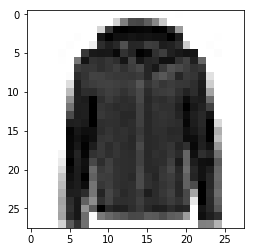

In [6]:
plt.imshow(X_train[0], cmap='binary')
plt.show()
plt.close()

Afficher les différentes valeurs des labels

In [7]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

Noms des classes :

In [8]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

La première image correspond donc à un coat :

In [9]:
class_names[y_train[0]]

'Coat'

Afficher les 50 premières images (utiliser des subplots en adaptant la taille de la figure)

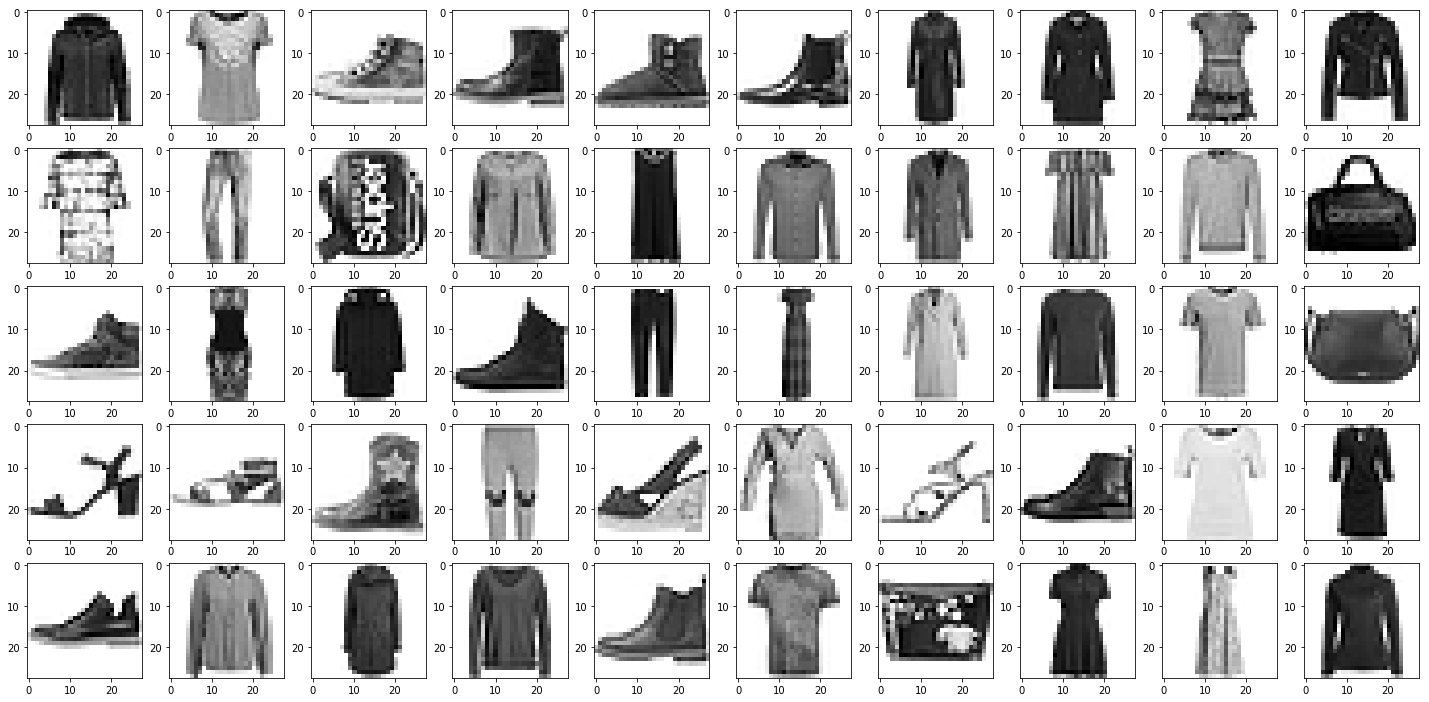

In [10]:
N = 50
plt.figure(figsize=(25,25))
for i in range(0,N):
    plt.subplot(10,N/5,i+1)
    plt.imshow(X_train[i], cmap='binary')
plt.show()
    

### Construction d'un réseau de neurones de classification avec Keras

### 2.1)
Construire un modèle séquentiel (keras.models.Sequential),(voir [doc](https://keras.io/models/about-keras-models/) ), sans aucun argument, puis ajoutez-y quatre couches en utilisant la méthode add ():
 - une couche Flatten (keras.layers.Flatten) pour convertir chaque image 28x28 en une rangée unique de 784 pixels. Comme il s'agit de la première couche du modèle, il faut spécifier l'argument input_shape en laissant de côté la taille du lot: [28, 28].
- une couche dense (keras.layers.Dense) avec 300 neurones (unités aka) et la fonction d'activation "relu".
- Une autre couche dense avec 100 neurones, également avec la fonction d'activation "relu".
- Une couche dense finale avec 10 neurones (un par classe) et la fonction d'activation "softmax" garantissant que la somme de toutes les probabilités de classe estimées pour chaque image est égale à 1.

In [11]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten

Using TensorFlow backend.


In [12]:
model = Sequential()

In [13]:
model.add(Flatten(input_shape=[28,28]))
model.add(Dense(300,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(10,activation='softmax'))

### 2.2)
Utiliser la méthode `summary()` pour étudier l'output.

In [14]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_2 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________
None


### 2.3) Compilation
Une fois le modèle créé, il faut utiliser la méthode `compile ()` pour spécifier la fonction `loss` et l'` optimiseur` à utiliser. On utilisera "sparse_categorical_crossentropy" pour le loss et l'optimiseur "sgd" (descente de gradient stochastique), spécifier également `metrics` à `accuracy`

In [15]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])

In [16]:
#print(model.summary())

### 2.4)
Entrainer le modèle en utilisant la méthode `fit()`<br/>
**Remarque**: la méthode `fit ()`retourne un objet `History`contenant des statistiques d'entraînement. Il peut être utile de conserver le résultat dans une variable : (history = model.fit (...)).

In [17]:
history = model.fit(X_train, y_train)

Epoch 1/1
55000/55000 [==============================] - 6s 116us/step - loss: 14.5072 - acc: 0.0999


In [18]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_2 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [19]:
history2 = model.fit(X_train, y_train, epochs=3, steps_per_epoch=3)

Epoch 1/3
3/3 [==============================] - 2s 574ms/step - loss: 14.5082 - acc: 0.1000
Epoch 2/3
3/3 [==============================] - 2s 554ms/step - loss: 14.5082 - acc: 0.1000
Epoch 3/3
3/3 [==============================] - 2s 539ms/step - loss: 14.5082 - acc: 0.1000


### 2.5)
Construire un dataframe avec l'objet history puis en faire une représenatation graphique (méthode plot())<br>
*Conseils* : 
- Afficher la grille et limiter les ordonnées à l'intervalle \[0, 1\]
- Il peut être utile de créer une fonction.

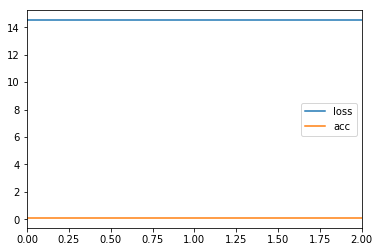

,loss,acc
0,14.508245,0.099982
1,14.508245,0.099982
2,14.508245,0.099982


In [20]:
hist=pd.DataFrame(history2.history)
hist.plot()
plt.show()
hist

### 2.6)
Relancer `model.fit()` , et remarquer qu'il reprend là où il s'était arrété.

### 2.7)
Evaluer le modèle avec la méthode `evaluate()`(as-t-on précision autour de 80% ?)

In [21]:
score = model.evaluate(X_test, y_test, batch_size=32)

10000/10000 [==============================] - 0s 42us/step


In [22]:
score

[14.50628703918457, 0.1]

In [23]:
#Non

### 2.8) Prédiction
Définir X_new par les 10 premières instances du jeu de tests. Utiliser la méthode de prédict() du modèle pour estimer la probabilité de chaque classe pour chaque instance (arrondir les résultats au 100ème):

In [24]:
X_new = X_test[:10]
result = model.predict(X_new, verbose=1)
result

10/10 [==============================] - 0s 3ms/step


array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32)

### 2.9)
Utilisez `np.argmax ()`pour obtenir l'ID de classe de la classe la plus probable pour chaque instance. *Utiliser 'axis=1'*

In [25]:
print([arg for arg in np.argmax(result, axis=1)])

[3, 3, 3, 3, 3, 3, 3, 3, 3, 3]


### 2.10) méthode predict_classes

Utiliser la méthode `predict_classes()` pour `X_new`. On devrait obtenir les mêmes résultats.

In [26]:
res = model.predict_classes(X_new)

### 2.11)
Utiliser `np.max()`pour déterminer une estimation de la probabilité associée à chaque classe.

In [27]:
np.max(result ,axis=1)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], dtype=float32)

## Exercice 3 – Normalisation

### 3.1)
Pour l'utilisation de la descente de gradient, il est généralement préférable de s'assurer que les entités soient mises à l'échelle, de préférence avec une distribution normale. Uniformiser les valeurs des pixels et tester les performances du réseau.

- *Utiliser `StandardScaler`de Scikit-Learn.
- *Relancer la méthode fit()

In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


In [29]:

#scaler.fit(X_train.flatten())

#scaler.fit(y_train)
#np.squeeze(X_train).shape
X_2d = np.ndarray((55000,784))
for x in range(55000):
    X_2d[x]=(X_train[x].flatten())




In [30]:
scaler.fit(X_2d)
#scaler.fit([y_train])
print(len(X_2d))
X_s_2d = scaler.transform(X_2d)
X_s_2d.shape

55000


(55000, 784)

In [31]:
print(X_s_2d.shape)

(55000, 784)


In [32]:
# Comparaison des différentes normalisation du jeu de données


### 3.2)
Tracer les courbes d'apprentissage et comparer avec celles obtenues dans la première partie.

In [33]:
model_s = Sequential()
model_s.add(Dense(300,activation='relu',input_shape=(784,)))
model_s.add(Dense(100,activation='relu'))
model_s.add(Dense(10,activation='softmax'))
model_s.compile(loss='sparse_categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])

In [34]:
history_s = model_s.fit(X_s_2d, y_train, verbose=1, epochs=3)

Epoch 1/3
55000/55000 [==============================] - 6s 106us/step - loss: 0.5277 - acc: 0.8158
Epoch 2/3
55000/55000 [==============================] - 6s 101us/step - loss: 0.3701 - acc: 0.8662
Epoch 3/3
55000/55000 [==============================] - 6s 103us/step - loss: 0.3298 - acc: 0.8813


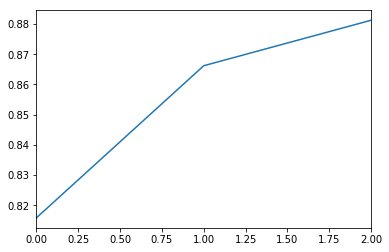

In [35]:
h= pd.DataFrame(history_s.history)
h.acc.plot()

plt.show()

## Exercice 4 – Les Callbacks

### 4.1)
La méthode `fit()` accepte un argument `callbacks`. Entrainer le modèle avec un grand nombre de `epoch` en y ajoutant les *callbacks* suvants (les callback proviennent de la librairie `keras.callbacks` et sont définis dans un tableau :
* `EarlyStopping`: avec `patience=5` pour arrêter l'apprentissage dès que le modèle ne change plus (5 epoch de marge)
* `ModelCheckpoint`: specifie le nom du modèle à enregistrer (exemple `"mnist_fashion.h5"`) avec `save_best_only=True` pour enregistrer le meilleur modèle obtenu.

callbacks=\[keras.callbacks.EarlyStopping......,
    keras.callbacks........\]<br/>
history = model.fit(............,
                    callbacks=callbacks)

Le callback `EarlyStopping` permettra de réduire les risques de sur-apprentissage.

In [36]:
len(X_valid)

5000

In [37]:
# Normalisation des donnees de validation
d2 = np.ndarray(shape=(len(X_valid),784))
for d in range(len(X_valid)):
    d2[i]=X_valid[i].flatten()
X_valid_s = scaler.transform(d2)

In [38]:
from keras.callbacks import EarlyStopping,ModelCheckpoint
model_s.fit(X_s_2d,
            y_train,
            verbose=1,
            epochs=30,
            callbacks=[
                EarlyStopping(
                    monitor='val_acc',
                    patience=5,
                    verbose=1,
                    mode='auto'),
                ModelCheckpoint('weights.{epoch:02d}-{acc:.2f}.hdf5',
                    monitor='val_acc',
                    verbose=1,
                    save_best_only=True,
                    save_weights_only=False,
                    mode='auto')],
           validation_data=(X_valid_s,y_valid),
           shuffle=True)

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 6s 106us/step - loss: 0.3024 - acc: 0.8912 - val_loss: 3.2208 - val_acc: 0.0988

Epoch 00001: val_acc improved from -inf to 0.09880, saving model to weights.01-0.89.hdf5
Epoch 2/30
55000/55000 [==============================] - 6s 105us/step - loss: 0.2806 - acc: 0.8989 - val_loss: 3.6393 - val_acc: 0.0988

Epoch 00002: val_acc did not improve from 0.09880
Epoch 3/30
55000/55000 [==============================] - 6s 105us/step - loss: 0.2637 - acc: 0.9048 - val_loss: 3.2868 - val_acc: 0.0988

Epoch 00003: val_acc did not improve from 0.09880
Epoch 4/30
55000/55000 [==============================] - 6s 105us/step - loss: 0.2470 - acc: 0.9100 - val_loss: 3.5873 - val_acc: 0.0988

Epoch 00004: val_acc did not improve from 0.09880
Epoch 5/30
55000/55000 [==============================] - 6s 105us/step - loss: 0.2342 - acc: 0.9157 - val_loss: 3.1708 - val_acc: 0.0988

Epoch 00005: val_

### 4.2)

Grâce aux callbacks, le dernier modèle enregistré est le meilleur sur le jeu de validation.<br>
Charger le modèle avec 'keras. Models. load_model () et l'évaluer sur l'ensemble de test.

In [39]:
m=keras.models.load_model('weights.06-0.90.hdf5')

In [40]:
# Normalisation des donnees de test
d2 = np.ndarray((len(X_test),784))
for i in range(len(X_test)):
    d2[i]=X_test[i].flatten()
X_test_s = scaler.transform(d2)

In [41]:
s =m.evaluate(X_test_s, y_test)

10000/10000 [==============================] - 0s 45us/step


In [42]:
s

[0.3696963671684265, 0.8665]

Une liste de callbacks est disponible sur https://keras.io/callbacks/